In [ ]:
#LY-IT-14_MLDL_Lab_Exp-03
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ALL-SEM-07/ML-DL\ 

/content/drive/MyDrive/ALL-SEM-07/ML-DL 


# **DATASET**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('diabetes2.csv')
df.head()

,pregnancy,glucose,bp,skinthickness,insulin,bmi,pedigreefunction,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd

In [ ]:
#encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df.label.values)
df.head(3)

,pregnancy,glucose,bp,skinthickness,insulin,bmi,pedigreefunction,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
X = df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X1 = df.drop(['label', 'pregnancy', 'glucose', 'age'], axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.3, random_state = 42, shuffle = True)

In [ ]:
X2 = df.drop(['label', 'bp', 'skinthickness', 'bmi'], axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.3, random_state = 42, shuffle = True)

In [ ]:
X3 = df.drop(['label', 'insulin', 'pedigreefunction'], axis = 1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size = 0.3, random_state = 42, shuffle = True)

In [ ]:
#training model

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
score = accuracy_score(y_test, clf.predict(X_test))

In [ ]:
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train1, y_train1)
score1 = accuracy_score(y_test1, clf1.predict(X_test1))
prediction1 = clf1.predict(X_test1)


In [ ]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X_train2, y_train2)
score2 = accuracy_score(y_test2, clf2.predict(X_test2))
prediction2 = clf2.predict(X_test2)

In [ ]:
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.5, random_state=100, shuffle=True)
clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(X_train3, y_train3)
score3 = accuracy_score(y_test3, clf3.predict(X_test3))
prediction3 = clf3.predict(X_test3)

In [ ]:
prediction1

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

# **Majority Voting**

In [ ]:
models = []
decision_trees = []
decision_trees.append(clf)
decision_trees.append(clf1)
decision_trees.append(clf2)
predictions = []
vote= []

predictions.append(prediction1)
predictions.append(prediction2)
predictions.append(prediction3)

for preds in predictions :
    models.append(preds.reshape(-1,1))
    ypred = np.concatenate(models,axis=1)

for voting in ypred :
     vote.append(stats.mode(voting)[0])

# for tree in decision_trees:
#     predictions = tree.predict(X_test1)
#     models.append(predictions.reshape(-1,1))
#     ypred = np.concatenate(models,axis=1)

print(vote)

[array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), arr

In [ ]:
mean_score = (score1 + score2 + score3)/3
print(mean_score)

0.6406926406926406


In [ ]:
score

0.7047244094488189

# **Comparing models**

In [ ]:
compare_models=[DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB()]
model_names=['Decision Tree','KNearestNeighbors', 'NaiveBayes', 'Random Forest']

acc=[]
d={}

for model in range(len(compare_models)):
    classifiers=compare_models[model]
    classifiers.fit(X_train,y_train)
    pred=classifiers.predict(X_test)
    acc.append(accuracy_score(pred, y_test))
     
acc.append(mean_score)     
d={'Modelling Algo':model_names,'Accuracy':acc}

In [ ]:
acc_frame = pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,Decision Tree,0.716535
1,KNearestNeighbors,0.700787
2,NaiveBayes,0.736220
3,Random Forest,0.640693


<BarContainer object of 4 artists>

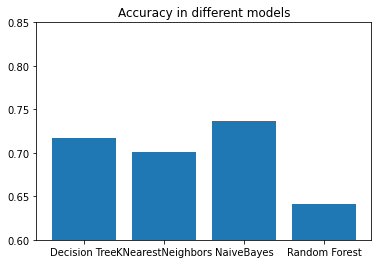

In [ ]:
import matplotlib.pyplot as plt

plt.title("Accuracy in different models")
plt.ylim(0.6,0.85)
plt.bar(model_names, acc)

[(0.0, 1.0)]

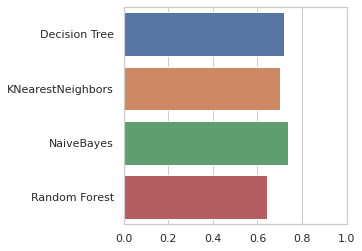

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.figure(figsize=(4, 4))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=model_names, x=acc)
ax.set(xlim=(0, 1))